In [4]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras import optimizers
import numpy as np

In [5]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [6]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3) 
Y_test=Y_test.reshape(len(Y_test),1) 
X_train=X_train/255.0
X_test=X_test/255.0 
print("Shape of X_train:",X_train.shape) 
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape) 
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


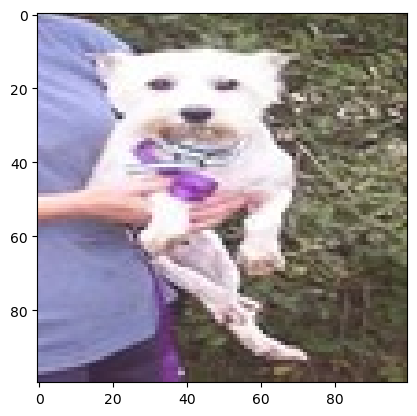

In [7]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Input
model = Sequential([ Input(shape=(100,100,3)), Conv2D(32, (3,3), activation='relu'), MaxPooling2D(2,2), Conv2D(32, (3,3), activation='relu'), MaxPooling2D(2,2), Flatten(), Dense(64, activation='relu'), Dense(1, activation='sigmoid') ])

In [10]:
opt=keras.optimizers.SGD(learning_rate=0.001) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.5410 - loss: 0.7014
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.5610 - loss: 0.6805
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.6495 - loss: 0.6300
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.7040 - loss: 0.5610
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.7455 - loss: 0.5222


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6800 - loss: 0.5938


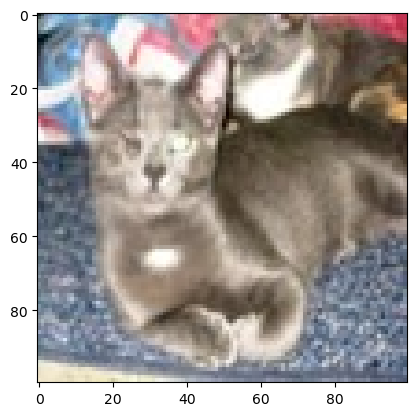

In [25]:
model.evaluate(X_test,Y_test) 
idx2=random.randint(0,len(Y_test)) 
plt.imshow(X_test[idx2,:])
plt.show()


In [26]:
y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))
confidence = y_pred[0][0]

print("Confidence:", confidence)

if confidence > 0.5:
    pred = 'cat'   # change if label mapping different
else:
    pred = 'dog'

print("Our model says it is a:", pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Confidence: 0.64889395
Our model says it is a: cat
